<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/notebook/lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Morphological Image Processing

In [1]:
path1 = '<your path>'

In [2]:
dpiv = 64 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
import scipy.signal as signal
import scipy.ndimage.morphology as mp

## Erosion

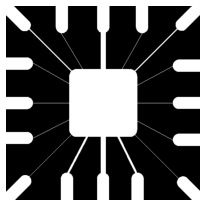

In [5]:
I = Image.open(path1+'circuitmask.tif')
f = np.array(I)
plt.figure(dpi=dpiv)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.show()

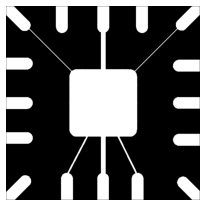

In [6]:
se = np.array([[0,1,0],[1,1,1],[0,1,0]])
g = mp.binary_erosion(f,se)
plt.figure(dpi=dpiv)
plt.imshow(g,cmap='gray')
plt.axis('off')
plt.show()

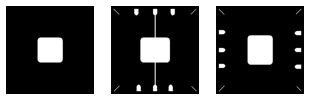

In [7]:
se1 = np.ones((64,64))

se2 = np.ones((64,16))
se3 = np.ones((16,64))
g = mp.binary_erosion(f,se1)
plt.figure(dpi=dpiv)

plt.subplot(1,3,1)
plt.imshow(g,cmap='gray')
plt.axis('off')
g = mp.binary_erosion(f,se2)

plt.subplot(1,3,2)
plt.imshow(g,cmap='gray')
plt.axis('off')
g = mp.binary_erosion(f,se3)

plt.subplot(1,3,3)
plt.imshow(g,cmap='gray')
plt.axis('off')
plt.show()

## Dilation

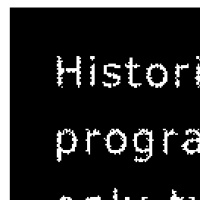

In [8]:
I = Image.open(path1+'text-broken.tif')
f = np.array(I)
f = f[:256,:256]
plt.figure(dpi=dpiv)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.show()

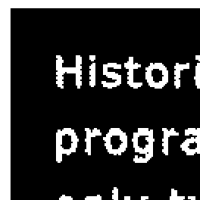

In [9]:
se = np.array([[0,1,0],[1,1,1],[0,1,0]])
se = np.ones((3,3))
g = mp.binary_dilation(f,se)
plt.figure(dpi=dpiv)
plt.imshow(g,cmap='gray')
plt.axis('off')
plt.show()

## Opening and Closing

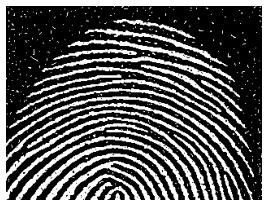

In [10]:
I = Image.open(path1+'fingerprint.tiff')
f = np.array(I)

plt.figure(dpi=dpiv)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.show()

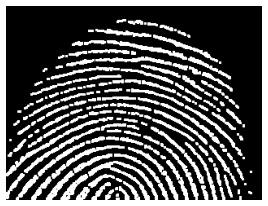

In [11]:
se = np.ones((3,3))
g = mp.binary_dilation(mp.binary_erosion(f,se),se)
plt.figure(dpi=dpiv)
plt.imshow(g,cmap='gray')
plt.axis('off')
plt.show()

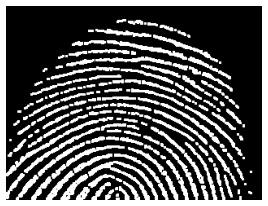

In [12]:
se = np.ones((3,3))
g1 = mp.binary_opening(f,se)
plt.figure(dpi=dpiv)
plt.imshow(g1,cmap='gray')
plt.axis('off')
plt.show()

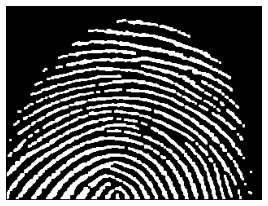

In [13]:
g2 = mp.binary_closing(g1,se)
#g2 = mp.binary_erosion(mp.binary_dilation(g1,se),se)
plt.figure(dpi=dpiv)
plt.imshow(g2,cmap='gray')
plt.axis('off')
plt.show()

## Boundary extraction

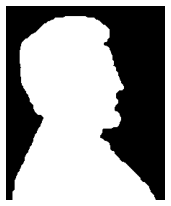

In [14]:
I = Image.open(path1+'lincoln.png')
f = np.array(I)
f[f>0] = 1

plt.figure(dpi=dpiv)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.show()

In [15]:
np.max(f)

1

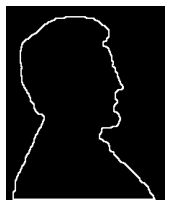

In [16]:
g = f - mp.binary_erosion(f,np.ones((5,5)))
plt.figure(dpi=dpiv)
plt.imshow(g,cmap='gray')
plt.axis('off')
plt.show()

## Grayscale erosion, dilation

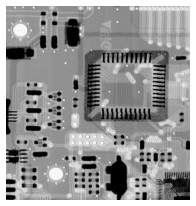

In [17]:
I = Image.open(path1+'circuitboard-section.tif')
f = np.array(I)
plt.figure(dpi=dpiv)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.show()


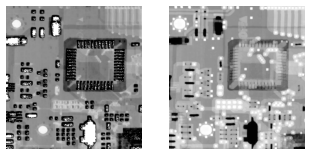

In [18]:
se = np.ones((5,5))
ge = mp.grey_erosion(f,structure=se)
gd = mp.grey_dilation(f,structure=se)
plt.figure(dpi=dpiv)

plt.subplot(1,2,1)
plt.imshow(ge,cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(gd,cmap='gray')
plt.axis('off')
plt.show()

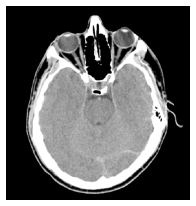

In [19]:
I = Image.open(path1+'headCT.tif')
f = np.array(I)
plt.figure(dpi=dpiv)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.show()


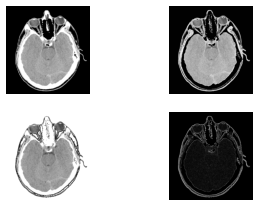

In [20]:
se = np.ones((3,3))

g1 = mp.grey_dilation(f,structure=se)
g2 = mp.grey_erosion(f,structure=se)

plt.figure(dpi=dpiv)
plt.subplot(2,2,1)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(g1,cmap='gray')
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(g2,cmap='gray')
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(g1-g2,cmap='gray')
plt.axis('off')
plt.show()

## Top-hat transformation

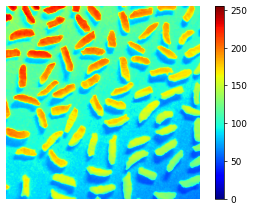

In [21]:
I = Image.open(path1+'rice-shaded.tif')
f = np.array(I)
plt.figure(dpi=dpiv)
plt.imshow(f,cmap='jet',vmin=0,vmax=255)
plt.axis('off')
plt.colorbar()
plt.show()


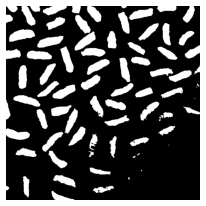

In [22]:
thv = 150
plt.figure(dpi=dpiv)
plt.imshow(f>thv,cmap='gray')
plt.axis('off')
plt.show()

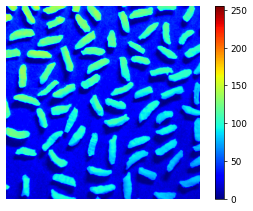

In [23]:
g = mp.grey_opening(f,150)
plt.figure(dpi=dpiv)
plt.imshow(f-g,cmap='jet',vmin=0,vmax=255)
plt.colorbar()
plt.axis('off')
plt.show()

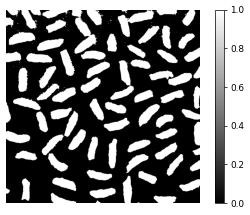

In [24]:
thv=50
plt.figure(dpi=dpiv)
plt.imshow((f-g)>thv,cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()

## Connected Components

In [25]:
import scipy.ndimage.measurements as meas

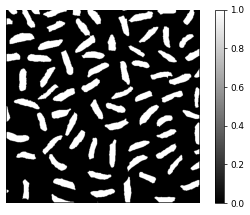

In [26]:
I = Image.open(path1+'rice-shaded.tif')
f = np.array(I)
g = mp.grey_opening(f,150)
m = (f-g)>50
m = mp.binary_erosion(m,structure=np.ones((5,5)))
plt.figure(dpi=dpiv)
plt.imshow(m,cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()


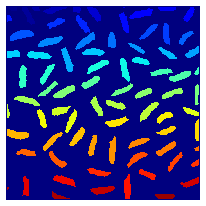

In [27]:
l,num = meas.label(m)
plt.figure(dpi=dpiv)
plt.imshow(l,cmap='jet',interpolation='nearest')
plt.axis('off')
plt.show()

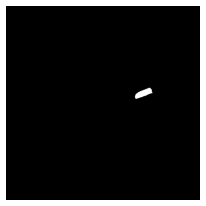

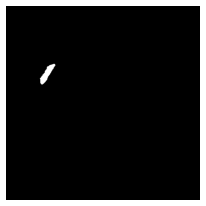

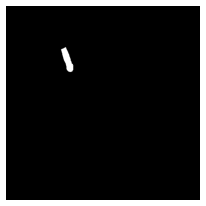

In [28]:
plt.figure(dpi=dpiv)
plt.imshow(l==42,cmap='gray')
plt.axis('off')
plt.show()

plt.figure(dpi=dpiv)
plt.imshow(l==32,cmap='gray')
plt.axis('off')
plt.show()

plt.figure(dpi=dpiv)
plt.imshow(l==24,cmap='gray')
plt.axis('off')
plt.show()